In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network
import matplotlib.pyplot as plt

import importlib
import mlTest
importlib.reload(mlTest)

<module 'mlTest' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\mlTest.py'>

In [2]:
df = pd.read_csv("data/kr-vs-kp.data", header=None)

In [3]:
df.shape

(3196, 37)

In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,...,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
freq,2839,2971,3076,2874,2129,1722,2026,2500,1980,2225,...,3195,3149,3060,2631,3021,1984,2007,2345,2407,1669


In [5]:
for i in range(37):
    df[i] = pd.Categorical(df[i])
    df[i] = df[i].cat.codes

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,...,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000
mean,0.111702,0.070401,0.037547,0.100751,0.333855,0.461202,0.366083,0.217772,0.380476,0.303817,...,0.000313,0.014706,0.042553,0.176783,0.054756,0.379224,0.627972,0.733730,0.246871,0.522215
std,0.315049,0.255861,0.190128,0.301046,0.471662,0.498570,0.481808,0.412796,0.485580,0.459977,...,0.017689,0.120392,0.201879,0.381545,0.227539,0.485270,0.483421,0.442076,0.431259,0.499584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
for i in range(0, 35):
    print(df[i].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
['l' 'g']
[0 1]
['n' 'w' 'b']
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]


In [7]:
X = df.drop(36, axis=1)
y = df[36]

In [8]:
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
X_train_val.shape

(2876, 36)

In [26]:
clf = svm.SVC()
clf.fit(X_train_val, y_train_val)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

[[131  19]
 [  7 163]]
0.91875


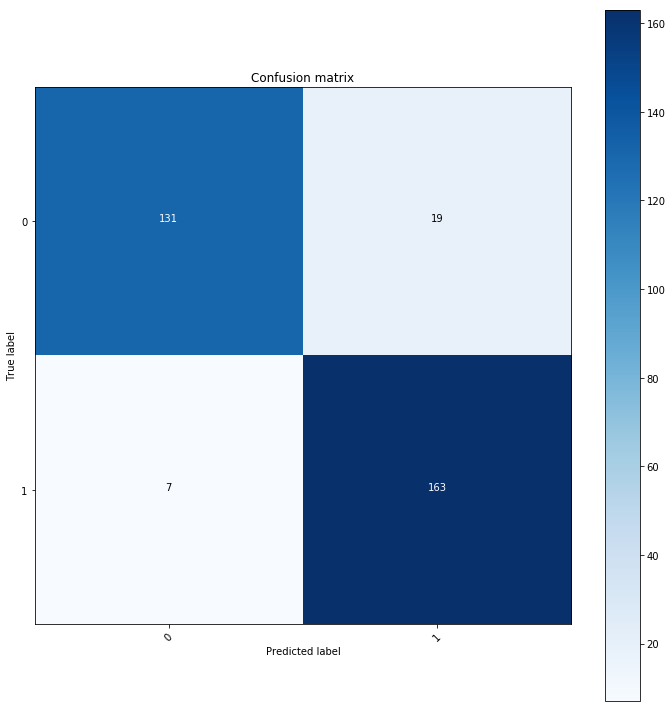

In [27]:
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[148   2]
 [  0 170]]
0.99375


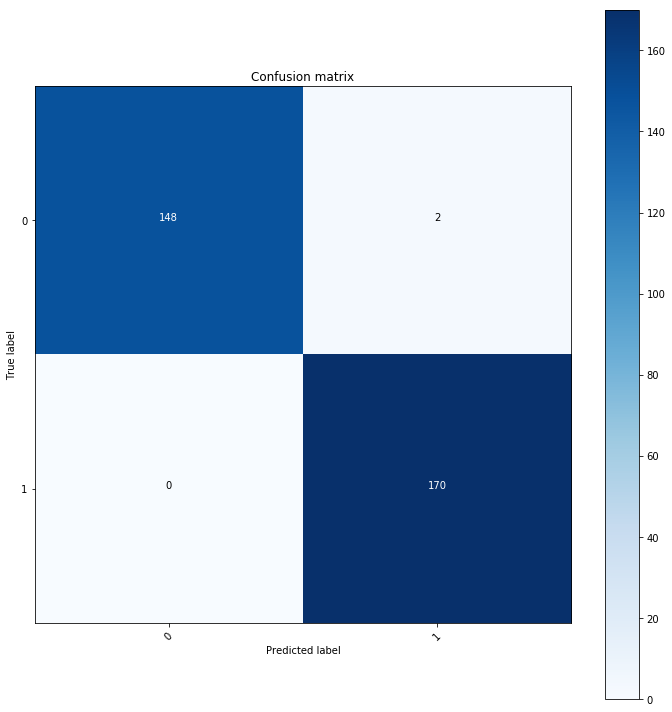

In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[143   7]
 [  5 165]]
0.9625


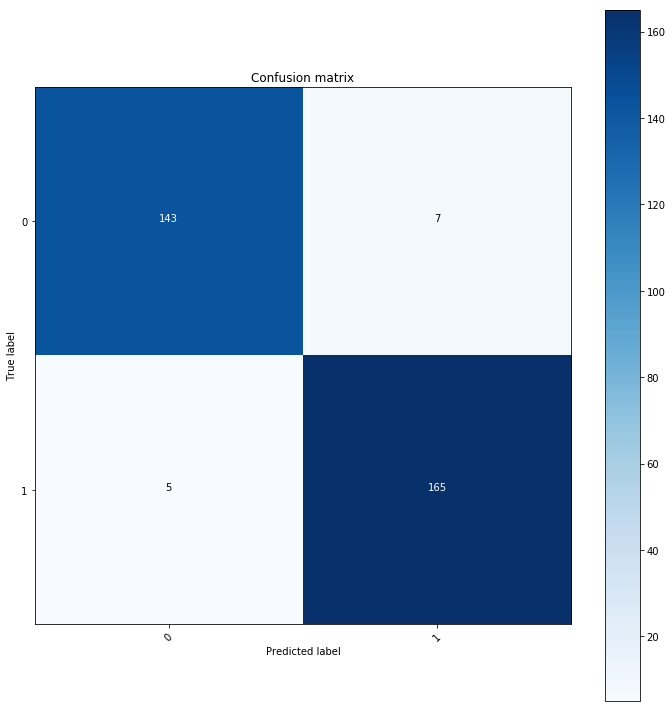

In [18]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

In [24]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8)
def KNNTest(X_train, y_train, X_val=None, y_val=None, cross_val=True, folds=5):
    train_acc = []
    test_acc = []
    param_vals = []
    min_val = 1
    max_val = 30
    num_step = 10
    i = 0
    for param_val in np.linspace(min_val, max_val, num=num_step):
        i += 1
        param_val = int(param_val)
        
        print("Step {}: Processing Param Val: {}".format(i, param_val), end='\r')
        
        param_vals.append(param_val)
        clf = neighbors.KNeighborsClassifier(n_neighbors=param_val)
        if cross_val:
            cv_result = model_selection.cross_validate(clf, X_train, y_train, cv=folds, return_train_score=True)
            #print("Time taken to cross validate: {}".format(np.mean(cv_result['fit_time'])))
            train_acc.append(np.mean(cv_result['train_score']))
            test_acc.append(np.mean(cv_result['test_score']))
        else:
            train_acc.append(test_accuracy(clf, cX_train, cy_train))
            test_acc.append(test_accuracy(clf, X_val, y_val))
    return train_acc, test_acc, param_vals
train_acc, test_acc, param_vals = KNNTest(X_train_val, y_train_val)

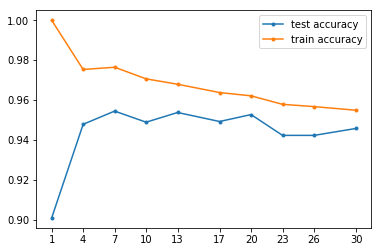

In [25]:
mlTest.plot_accuracy(train_acc, test_acc, param_vals, detail=True)

[[141   9]
 [  3 167]]


(array([[141,   9],
        [  3, 167]], dtype=int64), 0.9625)

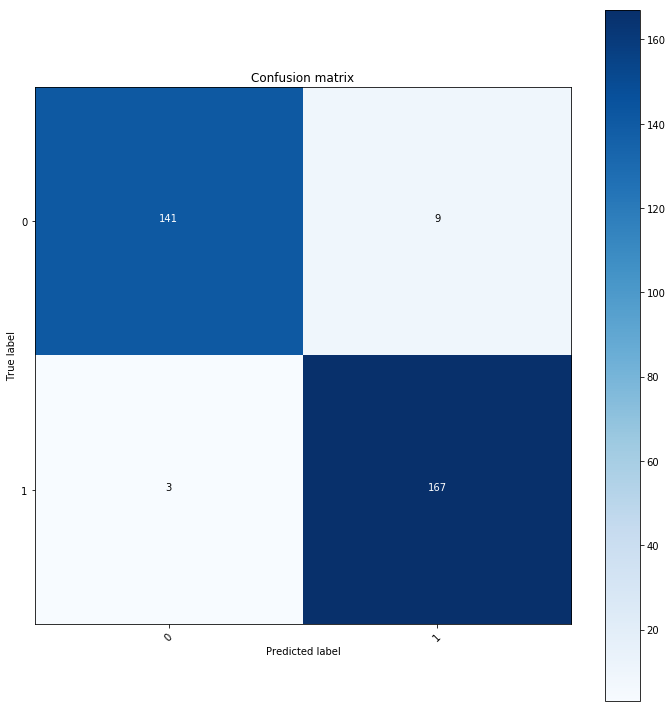

In [10]:
clf = ensemble.AdaBoostClassifier(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Dense(24,input_shape=(10,)))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(24))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train.values, y_train.values, epochs=5, batch_size=4096, validation_data=(X_val.values, y_val.values))
#mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

Train on 15216 samples, validate on 1902 samples
Epoch 1/5
15216/15216 [==============================] - 1s 69us/step - loss: nan - acc: 0.0156 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/5
15216/15216 [==============================] - 0s 2us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/5
15216/15216 [==============================] - 0s 2us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/5
15216/15216 [==============================] - 0s 3us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/5
15216/15216 [==============================] - 0s 2us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00


In [45]:
X_train.shape

(13104, 6)